# Imports

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, LassoCV, Ridge, LogisticRegression, BayesianRidge, TweedieRegressor, SGDClassifier, ElasticNet 
from sklearn.svm import SVR


from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import *

# DataFrame, Data et Variables

### Data Quality

In [172]:
df = pd.read_csv('logicimmo - Complet.csv')
X = df.drop('Prix (Euros)', axis = 1)
y = df['Prix (Euros)']

df.sort_values(by=['Prix (Euros)'], ascending=False).head(15)

,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
3643,417,6,4,9900000,75016,5,10,2,1,1,-1,-1,-1,-1,-1,-1,-1
3642,416,1,8,9375000,75116,0,10,8,1,1,-1,-1,-1,1,-1,-1,-1
2302,254,6,3,9225000,75008,2,10,7,1,1,-1,-1,-1,1,-1,-1,-1
508,254,6,3,9225000,75008,2,10,7,1,1,-1,-1,1,-1,-1,-1,-1
507,393,8,3,9000000,75116,0,10,5,1,1,1,-1,-1,1,-1,-1,-1
2301,393,8,3,9000000,75116,0,10,5,1,1,-1,-1,-1,1,-1,-1,-1
3641,265,6,2,7290000,75116,5,4,3,1,1,-1,-1,-1,-1,-1,-1,-1
3640,274,7,4,6950000,75007,4,10,-1,1,1,-1,-1,-1,-1,-1,-1,-1
3639,187,4,2,6600000,75008,0,10,8,1,1,-1,-1,-1,1,-1,-1,-1
3957,460,8,5,6500000,75116,0,0,3,1,1,-1,-1,-1,-1,-1,-1,-1


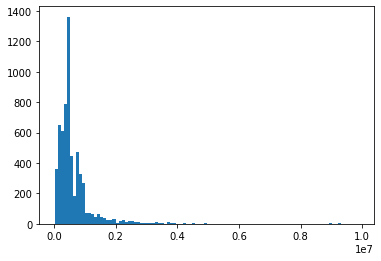

In [173]:
plt.hist(y, bins=100)
plt.show()
#histogramme des prix -> certains atteignent les 9 900 000 €

Pour éviter que les valeurs extrèmes biaisent le modèle, on ne les prend pas en compte.

In [174]:
compteur = 0
for prix in y :
    if prix > 2000000 :
        compteur += 1
        df.drop(df[df['Prix (Euros)'] == prix].index, inplace = True)

print("Nombre de biens supprimés : ",compteur)

X = df.drop('Prix (Euros)', axis = 1)
y = df['Prix (Euros)']

df.sort_values(by=['Prix (Euros)'], ascending=False).head(15)

Nombre de biens supprimés :  224


,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
2251,168,6,4,2000000,75009,0,10,2,1,1,-1,-1,-1,-1,-1,-1,-1
3536,188,7,4,1990000,75016,4,10,3,1,1,-1,-1,-1,-1,-1,-1,-1
460,100,3,2,1990000,75001,0,10,4,1,1,-1,-1,-1,1,-1,-1,-1
461,188,7,4,1990000,75016,4,10,3,1,1,-1,-1,1,-1,-1,-1,-1
462,133,5,3,1990000,75016,0,1,2,1,1,-1,-1,1,1,-1,-1,-1
2248,100,3,2,1990000,75001,0,10,4,1,1,-1,-1,1,1,-1,-1,-1
2249,133,5,3,1990000,75016,0,1,2,1,1,1,-1,1,1,-1,-1,-1
2250,188,7,4,1990000,75016,4,10,3,1,1,1,1,1,1,-1,-1,-1
3535,138,5,3,1984000,75008,2,10,5,1,1,-1,-1,-1,-1,-1,-1,-1
3937,156,1,5,1980000,75005,6,10,2,1,1,-1,-1,-1,-1,-1,-1,-1


In [175]:
df.shape

(5951, 17)

In [253]:
df.isnull().sum()

Superficie (m2)       0
Nombre Pieces         0
Nombre Chambres       0
Prix (Euros)          0
Code Postal           0
Classe Energetique    0
Nombre Photos         0
Etage                 0
Type de Bien          0
Type Vendeur          0
Terrasse              0
Parking               0
Cave                  0
Ascenseur             0
Gardien               0
Renove                0
Box                   0
dtype: int64

In [254]:
df.duplicated().sum()
#Pas de variable ID_appartement => Pas nécessairement des doublons, justes des appartements avec les mêmes données

677

In [262]:
df['Type de Bien'].value_counts()
#Uniquement des appartements

1    5951
Name: Type de Bien, dtype: int64

In [264]:
df['Type Vendeur'].value_counts()
#Uniquement des vendeurs Pro

1    5951
Name: Type Vendeur, dtype: int64

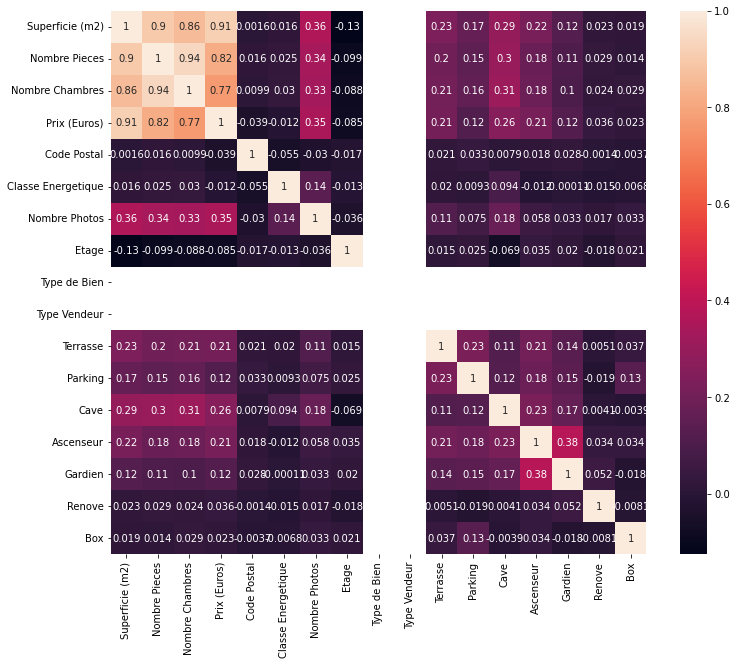

In [259]:
corr = df.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [271]:
df_dummies = pd.get_dummies(df)
df_dummies
#Aucun changement => que des données numériques
#Donc aucunes modification à faire pour utiliser le df avec un modèle de régression

,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
0,64,3,2,830000,75017,5,1,3,1,1,-1,-1,-1,-1,-1,-1,-1
1,122,5,5,1470000,75015,0,10,3,1,1,1,1,1,1,-1,-1,1
2,5,1,0,65000,75116,5,6,6,1,1,-1,-1,-1,1,1,1,-1
3,7,1,0,80000,75015,0,4,7,1,1,-1,-1,-1,-1,1,-1,-1
4,8,1,0,87000,75006,0,4,6,1,1,-1,-1,-1,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6170,80,3,2,799000,75015,0,10,2,1,1,1,-1,-1,-1,-1,-1,-1
6171,39,2,1,799000,75002,4,10,4,1,1,-1,-1,-1,1,-1,-1,-1
6172,73,3,2,799000,75010,5,8,8,1,1,-1,1,-1,-1,-1,-1,-1
6173,121,7,4,799000,75018,3,10,-1,1,1,-1,-1,1,-1,-1,1,-1


## Modélisation

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [177]:
MAE_list = []
RMSE_list = []
median_abs_err_list = []
model_list = []
score_list = []
mean_error_list = []
r2_list = []
max_error_list = []
variance_list = []
percentage_error_list = []

# Modèles  :

### 1) Regression linéaire 

In [178]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train,y_train)
score_lin_reg = model_lin_reg.score(X_test,y_test)
score_list.append(score_lin_reg)
score_lin_reg

0.8581284902361551

In [179]:
cross_val_score(model_lin_reg, X, y, cv=3)

array([0.73909179, 0.82132286, 0.86081494])

In [180]:
linear_selector = SelectFromModel(LinearRegression(),threshold='mean')
linear_selector.fit_transform(X,y)
linear_selector.get_support()

array([False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True])

In [181]:
y_pred = model_lin_reg.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  84366.54513912347
RMSE :  133743.31965818716
median absolut error :  51528.682024002075
R2 score :  0.8581284902361551
Max error :  940506.5762443691
Explained variance :  0.8581478942499965
mean abs percentage error :  0.17804198376103056


In [182]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Regression \nLineaire")

<function matplotlib.pyplot.show(close=None, block=None)>

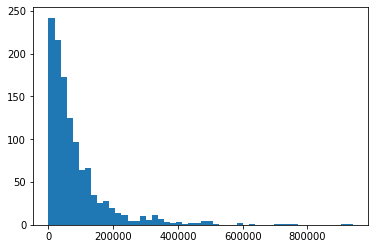

In [183]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [184]:
cross_val_score(model_lin_reg, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -81765.70631532, -122008.77872169,  -71263.43009842])

### 2) Lasso CV

In [185]:
model_lasso_cv = LassoCV(cv=5)
model_lasso_cv.fit(X_train, y_train)
score_lasso_cv = model_lasso_cv.score(X_test, y_test)
score_list.append(score_lasso_cv)
score_lasso_cv

0.8544600255463308

In [186]:
cross_val_score(model_lasso_cv, X, y, cv=3)

array([0.72753415, 0.81823702, 0.86162883])

In [187]:
lasso_selector = SelectFromModel(LassoCV(cv=3),threshold='mean')
lasso_selector.fit_transform(X,y)
lasso_selector.get_support()

array([ True, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False])

In [188]:
y_pred = model_lasso_cv.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  84844.74508893312
RMSE :  135461.4283494978
median absolut error :  51475.09403181076
R2 score :  0.8544600255463308
Max error :  979794.7406003773
Explained variance :  0.8544902020925642
mean abs percentage error :  0.17268691489011356


In [189]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Lasso CV")

<function matplotlib.pyplot.show(close=None, block=None)>

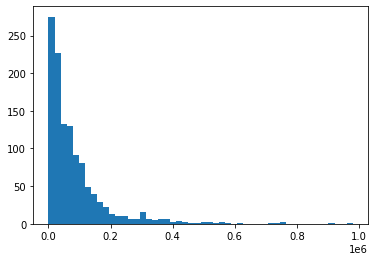

In [190]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [191]:
cross_val_score(model_lasso_cv, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -82857.33714426, -122144.08736695,  -69927.54266719])

### 3) Ridge

In [192]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
score_ridge = model_ridge.score(X_test, y_test)
score_list.append(score_ridge)
score_ridge

0.8581293933023592

In [193]:
cross_val_score(model_ridge, X, y, cv=3)

array([0.73907386, 0.82134233, 0.86081895])

In [194]:
Ridge_selector = SelectFromModel(Ridge(),threshold='mean')
Ridge_selector.fit_transform(X,y)
Ridge_selector.get_support()

array([False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True])

In [195]:
y_pred = model_ridge.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  84365.33673816832
RMSE :  133742.89399392094
median absolut error :  51547.69253574312
R2 score :  0.8581293933023592
Max error :  940590.3559280187
Explained variance :  0.8581489813633535
mean abs percentage error :  0.17803502946470948


In [196]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Ridge")

<function matplotlib.pyplot.show(close=None, block=None)>

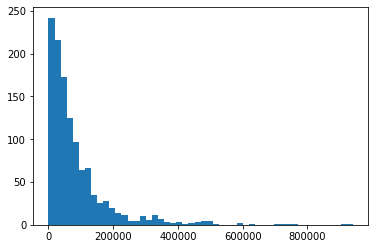

In [197]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [198]:
cross_val_score(model_ridge, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -81767.63940267, -121992.91072073,  -71259.48866104])

### 4) SVR

In [199]:
#model_SVR = SVR(kernel='rbf')
#model_SVR.fit(X_train,y_train)
#model_SVR.score(X_test,y_test)
#score trop faible, process long -> inutile

### 5) SGDClassifier

In [200]:
#model_SGD = SGDClassifier(max_iter=1000, tol=0.01)
#model_SGD.fit(X_train,y_train)
#model_SGD.score(X_test,y_test)

### 6) LogisticRegression

In [201]:
#model_logistic_reg = LogisticRegression()
#model_logistic_reg.fit(X_train,y_train)
#model_logistic_reg.score(X_test,y_test)

### 7) BayesianRidge

In [202]:
model_bayesian = BayesianRidge()
model_bayesian.fit(X_train, y_train)
score_bayesian = model_bayesian.score(X_test, y_test)
score_list.append(score_bayesian)
score_bayesian

0.858128240408501

In [203]:
cross_val_score(model_bayesian, X, y, cv=3)

array([0.73725765, 0.8213844 , 0.8617051 ])

In [204]:
selector_bayesian = SelectFromModel(BayesianRidge(),threshold='mean')
selector_bayesian.fit_transform(X,y)
selector_bayesian.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True])

In [205]:
y_pred = model_bayesian.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  84316.05705923759
RMSE :  133743.43741532232
median absolut error :  51452.85440249741
R2 score :  0.858128240408501
Max error :  947358.9904571325
Explained variance :  0.8581520383118448
mean abs percentage error :  0.17743569789905161


In [206]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Bayesian \nRidge")

<function matplotlib.pyplot.show(close=None, block=None)>

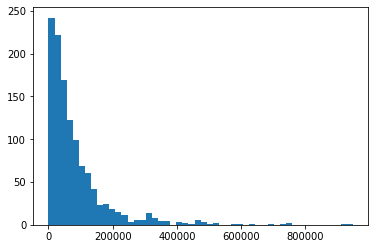

In [207]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [208]:
cross_val_score(model_bayesian, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -82033.92084043, -121842.51800721,  -71006.68558159])

### 8) TweedieRegressor

In [209]:
model_tweedie = TweedieRegressor(max_iter=1000)
model_tweedie.fit(X_train, y_train)
score_tweedie = model_tweedie.score(X_test, y_test)
score_list.append(score_tweedie)
score_tweedie

0.8533989859545523

In [210]:
cross_val_score(model_tweedie, X, y, cv=3)

array([0.72885326, 0.81672999, 0.86031541])

In [211]:
selector_tweedie = SelectFromModel(TweedieRegressor(max_iter=1000),threshold='mean')
selector_tweedie.fit_transform(X,y)
selector_tweedie.get_support()

array([ True, False,  True, False,  True,  True,  True, False, False,
       False,  True, False,  True, False, False, False])

In [212]:
y_pred = model_tweedie.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  85397.04736491673
RMSE :  135954.3133070517
median absolut error :  51379.21002917341
R2 score :  0.8533989859545523
Max error :  971113.7642937116
Explained variance :  0.8534228870674625
mean abs percentage error :  0.17321361915249853


In [213]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Tweedie \nRegressor")

<function matplotlib.pyplot.show(close=None, block=None)>

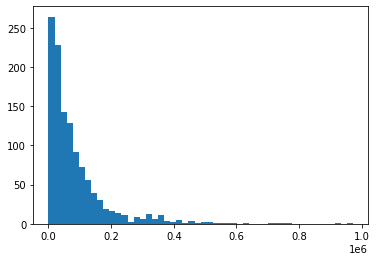

In [214]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [215]:
cross_val_score(model_tweedie, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -83334.74782756, -122955.19375751,  -70869.85568506])

### 9) Elastic Net

In [216]:
model_elastic = ElasticNet(alpha=0.01)
model_elastic.fit(X_train, y_train)
score_elastic = model_elastic.score(X_test, y_test)
score_list.append(score_elastic)
score_elastic

0.8581425024806497

In [217]:
cross_val_score(model_elastic, X, y, cv=3)

array([0.73878772, 0.82145294, 0.86101214])

In [218]:
selector_elastic = SelectFromModel(ElasticNet(alpha=0.01),threshold='mean')
selector_elastic.fit_transform(X,y)
selector_elastic.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True])

In [219]:
y_pred = model_elastic.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  84348.24625338538
RMSE :  133736.7147719296
median absolut error :  51576.49660231173
R2 score :  0.8581425024806497
Max error :  942360.9881876856
Explained variance :  0.8581643923402109
mean abs percentage error :  0.17788677164014036


In [220]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Elastic \nNet")

<function matplotlib.pyplot.show(close=None, block=None)>

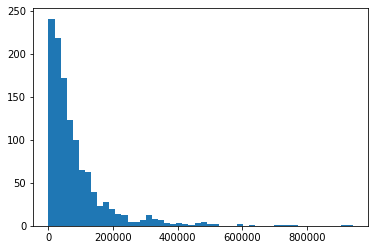

In [221]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [222]:
cross_val_score(model_elastic, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -81839.68810795, -121899.65327838,  -71184.18328501])

# Comparaisons des modèles

### Résultats :

#### Accuracy 

Text(0, 0.5, 'Accuracy')

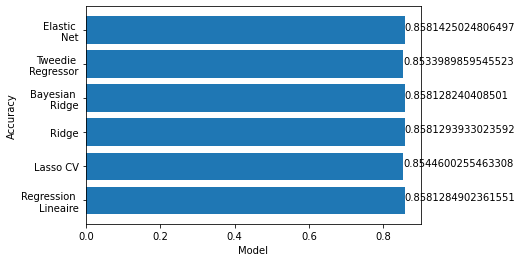

In [223]:
plt.barh(model_list, score_list)
for index, value in enumerate(score_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Accuracy')

### Erreurs : 

#### 1) Mean Error 

Text(0, 0.5, 'Mean error')

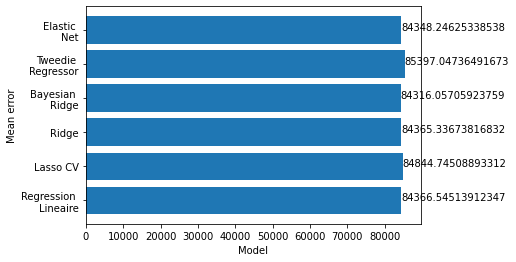

In [224]:
plt.barh(model_list, mean_error_list)
for index, value in enumerate(mean_error_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Mean error')

#### 2) Mean Absolute Error using MAE

Text(0, 0.5, 'MAE')

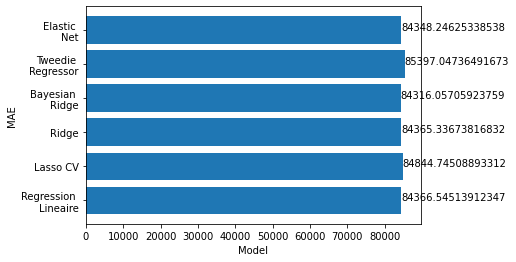

In [225]:
plt.barh(model_list, MAE_list)
for index, value in enumerate(MAE_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('MAE')

#### 3) Root Mean Square Error (RMSE)

Text(0, 0.5, 'RMSE')

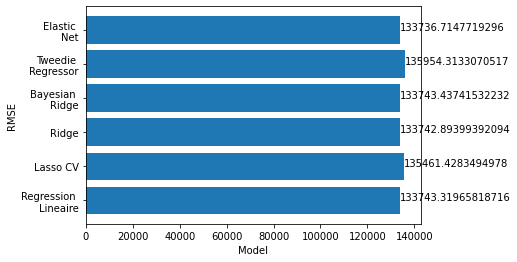

In [226]:
plt.barh(model_list, RMSE_list)
for index, value in enumerate(RMSE_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('RMSE')

#### 4) Median Absolute Error

Text(0, 0.5, 'Median Abs Error')

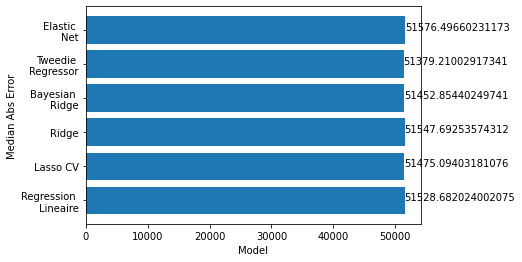

In [227]:
plt.barh(model_list, median_abs_err_list)
for index, value in enumerate(median_abs_err_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Median Abs Error')

#### 5) R2 Score (coeficient of determination)

Text(0, 0.5, 'r2 score')

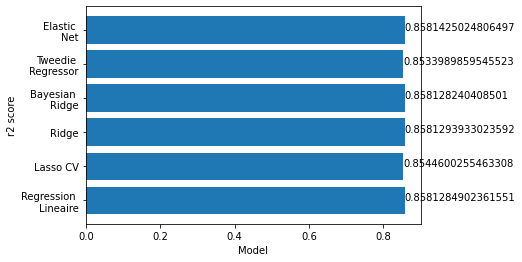

In [228]:
plt.barh(model_list, r2_list)
for index, value in enumerate(r2_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('r2 score')

#### 6) Maximum Error 

Text(0, 0.5, 'Max Error')

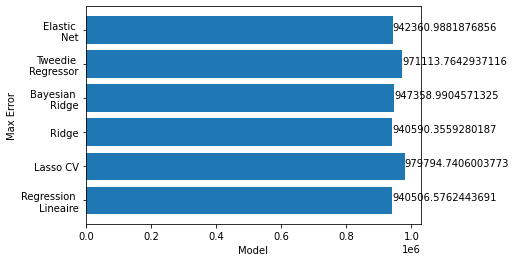

In [229]:
plt.barh(model_list, max_error_list)
for index, value in enumerate(max_error_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Max Error')

#### 7) Explained Variance Score 

Text(0, 0.5, 'Explained Variance Score')

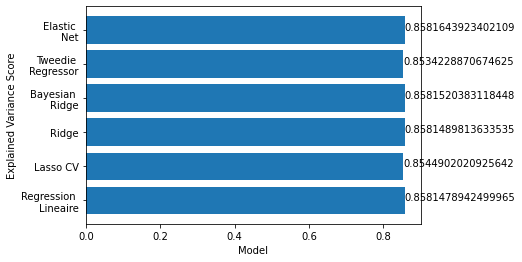

In [230]:
plt.barh(model_list, variance_list)
for index, value in enumerate(variance_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Explained Variance Score')

#### 8) Mean Absolute Percentage Error

Text(0, 0.5, 'Mean Abs Percentage Error')

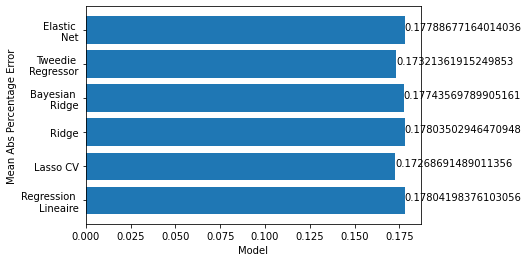

In [231]:
plt.barh(model_list, percentage_error_list)
for index, value in enumerate(percentage_error_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Mean Abs Percentage Error')

### Features : 

In [232]:
df.head()

,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
0,64,3,2,830000,75017,5,1,3,1,1,-1,-1,-1,-1,-1,-1,-1
1,122,5,5,1470000,75015,0,10,3,1,1,1,1,1,1,-1,-1,1
2,5,1,0,65000,75116,5,6,6,1,1,-1,-1,-1,1,1,1,-1
3,7,1,0,80000,75015,0,4,7,1,1,-1,-1,-1,-1,1,-1,-1
4,8,1,0,87000,75006,0,4,6,1,1,-1,-1,-1,1,1,-1,-1


In [233]:
df[['Code Postal','Prix (Euros)', 'Superficie (m2)']]

,Code Postal,Prix (Euros),Superficie (m2)
0,75017,830000,64
1,75015,1470000,122
2,75116,65000,5
3,75015,80000,7
4,75006,87000,8
...,...,...,...
6170,75015,799000,80
6171,75002,799000,39
6172,75010,799000,73
6173,75018,799000,121


In [234]:
print(df["Code Postal"].value_counts())
print(df.groupby('Code Postal')['Prix (Euros)'].mean())

75018    755
75015    688
75017    501
75019    419
75016    411
75020    408
75011    362
75014    343
75010    320
75013    309
75012    291
75009    190
75007    145
75005    134
75006    133
75008    124
75003    109
75004    105
75002     87
75116     64
75001     53
Name: Code Postal, dtype: int64
Code Postal
75001    639579.245283
75002    421386.206897
75003    745721.100917
75004    642161.714286
75005    550647.014925
75006    658959.849624
75007    744940.000000
75008    762999.112903
75009    617415.263158
75010    511503.993750
75011    489544.779006
75012    523129.817869
75013    479005.647249
75014    546016.297376
75015    555446.468023
75016    624818.535280
75017    500944.870259
75018    424221.249007
75019    473317.952267
75020    448333.580882
75116    609071.875000
Name: Prix (Euros), dtype: float64


In [235]:
print(df["Superficie (m2)"].value_counts())
print(df.groupby('Superficie (m2)')['Prix (Euros)'].mean())

38     144
42     136
36     125
18     122
43     116
      ... 
159      1
237      1
131      1
147      1
156      1
Name: Superficie (m2), Length: 166, dtype: int64
Superficie (m2)
0      2.120033e+05
5      6.220833e+04
6      6.961028e+04
7      8.612788e+04
8      8.968505e+04
           ...     
177    1.670000e+06
180    9.800000e+05
188    1.990000e+06
229    1.360000e+06
237    1.350000e+06
Name: Prix (Euros), Length: 166, dtype: float64


In [236]:
print(df["Nombre Pieces"].value_counts())
print(df.groupby('Nombre Pieces')['Prix (Euros)'].mean())

2    2001
1    1829
3    1264
4     564
5     233
6      50
7      10
Name: Nombre Pieces, dtype: int64
Nombre Pieces
1    2.300634e+05
2    4.527766e+05
3    7.129863e+05
4    9.749968e+05
5    1.244356e+06
6    1.560220e+06
7    1.363600e+06
Name: Prix (Euros), dtype: float64


In [237]:
print(df["Nombre Chambres"].value_counts())
print(df.groupby('Nombre Chambres')['Prix (Euros)'].mean())

1    2205
0    1836
2    1331
3     450
4     120
5       9
Name: Nombre Chambres, dtype: int64
Nombre Chambres
0    2.320941e+05
1    4.800115e+05
2    7.770106e+05
3    1.034296e+06
4    1.360446e+06
5    1.338778e+06
Name: Prix (Euros), dtype: float64


In [238]:
print(df["Classe Energetique"].value_counts())
print(df.groupby('Classe Energetique')['Prix (Euros)'].mean())

0    1937
5    1256
4    1117
7     642
6     624
3     297
2      45
1      33
Name: Classe Energetique, dtype: int64
Classe Energetique
0    470136.915333
1    546968.181818
2    773448.800000
3    738308.929293
4    700889.324978
5    560974.614650
6    431284.839744
7    342834.157321
Name: Prix (Euros), dtype: float64


In [239]:
print(df["Nombre Photos"].value_counts())
print(df.groupby('Nombre Photos')['Prix (Euros)'].mean())

10    2143
8      630
6      621
9      613
7      582
5      467
4      378
3      235
1      159
2      100
0       23
Name: Nombre Photos, dtype: int64
Nombre Photos
0     326980.000000
1     439926.974843
2     410236.040000
3     323695.523404
4     333132.878307
5     358494.867238
6     418908.045089
7     429888.044674
8     505639.380952
9     568880.510604
10    697140.107793
Name: Prix (Euros), dtype: float64


In [240]:
print(df["Etage"].value_counts())
print(df.groupby('Etage')['Prix (Euros)'].mean())

 1    1087
-1    1049
 2     929
 3     811
 4     627
 6     566
 5     489
 7     272
 8      89
 9      32
Name: Etage, dtype: int64
Etage
-1    492169.123928
 1    562642.168353
 2    587736.589882
 3    622673.175092
 4    574588.519936
 5    552449.578732
 6    361883.340989
 7    302119.639706
 8    499689.213483
 9    585140.000000
Name: Prix (Euros), dtype: float64


In [241]:
print(df["Terrasse"].value_counts())
print(df.groupby('Terrasse')['Prix (Euros)'].mean())

-1    4963
 1     988
Name: Terrasse, dtype: int64
Terrasse
-1    497443.741084
 1    699062.324899
Name: Prix (Euros), dtype: float64


In [242]:
print(df["Parking"].value_counts())
print(df.groupby('Parking')['Prix (Euros)'].mean())

-1    5570
 1     381
Name: Parking, dtype: int64
Parking
-1    520127.035009
 1    688659.524934
Name: Prix (Euros), dtype: float64


In [243]:
print(df["Cave"].value_counts())
print(df.groupby('Cave')['Prix (Euros)'].mean())

-1    3065
 1    2886
Name: Cave, dtype: int64
Cave
-1    442167.544535
 1    625170.942481
Name: Prix (Euros), dtype: float64


In [244]:
print(df["Ascenseur"].value_counts())
print(df.groupby('Ascenseur')['Prix (Euros)'].mean())

-1    3708
 1    2243
Name: Ascenseur, dtype: int64
Ascenseur
-1    471345.373786
 1    629397.333036
Name: Prix (Euros), dtype: float64


In [245]:
print(df["Gardien"].value_counts())
print(df.groupby('Gardien')['Prix (Euros)'].mean())

-1    4627
 1    1324
Name: Gardien, dtype: int64
Gardien
-1    508626.813270
 1    608814.651813
Name: Prix (Euros), dtype: float64


In [246]:
print(df["Renove"].value_counts())
print(df.groupby('Renove')['Prix (Euros)'].mean())

-1    5635
 1     316
Name: Renove, dtype: int64
Renove
-1    527902.914818
 1    584664.363924
Name: Prix (Euros), dtype: float64


In [247]:
print(df["Box"].value_counts())
print(df.groupby('Box')['Prix (Euros)'].mean())

-1    5944
 1       7
Name: Box, dtype: int64
Box
-1    530631.201884
 1    773571.428571
Name: Prix (Euros), dtype: float64


### Les prix trop élevés affectent les métriques

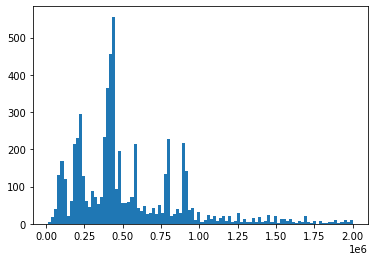

In [248]:
plt.hist(y, bins=100)
plt.show()

In [249]:
print(max(y))

2000000


Text(0, 0.5, 'prix')

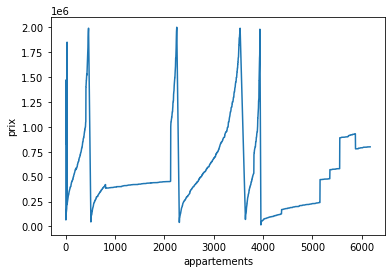

In [250]:
ax = df['Prix (Euros)'].plot()
ax.set_xlabel("appartements")
ax.set_ylabel("prix")

In [251]:
val = []
for i in y :
    if i > 6000000 :
        val.append(i)
print(len(val))
print(val)

0
[]


In [252]:
df.sort_values(by=['Prix (Euros)'], ascending=False).head(15)

,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
2251,168,6,4,2000000,75009,0,10,2,1,1,-1,-1,-1,-1,-1,-1,-1
3536,188,7,4,1990000,75016,4,10,3,1,1,-1,-1,-1,-1,-1,-1,-1
460,100,3,2,1990000,75001,0,10,4,1,1,-1,-1,-1,1,-1,-1,-1
461,188,7,4,1990000,75016,4,10,3,1,1,-1,-1,1,-1,-1,-1,-1
462,133,5,3,1990000,75016,0,1,2,1,1,-1,-1,1,1,-1,-1,-1
2248,100,3,2,1990000,75001,0,10,4,1,1,-1,-1,1,1,-1,-1,-1
2249,133,5,3,1990000,75016,0,1,2,1,1,1,-1,1,1,-1,-1,-1
2250,188,7,4,1990000,75016,4,10,3,1,1,1,1,1,1,-1,-1,-1
3535,138,5,3,1984000,75008,2,10,5,1,1,-1,-1,-1,-1,-1,-1,-1
3937,156,1,5,1980000,75005,6,10,2,1,1,-1,-1,-1,-1,-1,-1,-1
